In [1]:
%load_ext autoreload
%autoreload 2

## Images to Vectors 

In [2]:
import os
import re

import numpy as np
import pandas as pd
from sklearn import preprocessing
from tqdm.auto import tqdm

from meezer.helpers import Img2Vec

In [3]:
input_path = '/meezer/data/labelled_faces/'
files = os.listdir(input_path)

In [4]:
img2vec = Img2Vec()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
test_image = os.path.join(input_path, files[0])
vec = img2vec.get_vec(test_image)

vec_length = vec.shape[0]

In [6]:
# Matrix to hold the image vectors
X = np.zeros((len(files), vec_length))

print('Reading images...')
for index, file in tqdm(enumerate(files)):
    filename = os.fsdecode(file)
    vec = img2vec.get_vec(os.path.join(input_path, filename))
    X[index, :] = vec

Reading images...


In [7]:
reg_ex_pat = r'([^/]+)_\d+.jpeg$'

cleaned_filenames = [re.findall(reg_ex_pat, filename)[0] for filename in files]

## Test Data Split 

In [20]:
face_to_holdout = 'lois_Death_Has_a_Shadow'

cleaned_filenames_array = np.array(cleaned_filenames)

train_idxs = np.argwhere(cleaned_filenames_array != face_to_holdout).flatten()
test_idxs = np.argwhere(cleaned_filenames_array == face_to_holdout).flatten()

X_train = X[train_idxs]
X_test = X[test_idxs]
filenames_train = cleaned_filenames_array[train_idxs]
filenames_test = cleaned_filenames_array[test_idxs]

In [21]:
le = preprocessing.LabelEncoder()

labels = le.fit_transform(filenames_train)

In [22]:
pd.Series(labels).value_counts()

73    124
82    123
13    120
66    118
79    117
     ... 
45      5
51      5
46      5
59      4
92      2
Length: 95, dtype: int64

## Train a Model 

In [23]:
from meezer import Meezer

In [24]:
model = Meezer(embedding_dims=2,
               k=10,
               distance='pn',
               batch_size=64,
               epochs=10,
               sub_epochs=10,
               margin=1,
               ntrees=50,
               search_k=-1,
               model='maaten',
               supervision_metric='sparse_categorical_crossentropy',
               supervision_weight=1.,
               annoy_index_path='annoy.index',
               early_stopping=True,
               reduce_lr_amount=0.95,
               verbose=True)

In [25]:
embeddings = model.fit_transform(X=X_train, Y=labels)

Building KNN index...



Extracting KNN from index...



Training neural network...


Epoch 0: loss 2.5165289785515244
New learning rate set to: 0.0009500000160187483
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 1: loss 1.2987899721752312
New learning rate set to: 0.0009025000035762787
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 2: loss 1.0843056138437046
New learning rate set to: 0.0008573749801144004
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 3: loss 0.8120148005620527
New learning rate set to: 0.0008145062020048499
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 4: loss 0.7941401385055468
New learning rate set to: 0.000773780862800777
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 5: loss 0.6912962218367225
New learning rate set to: 0.0007350918021984398
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 6: loss 0.6070714

In [26]:
test_embeddings = model.transform(X_test)

76/76 [==============================] - 0s 203us/sample


## Visualize Embeddings 

In [27]:
import matplotlib
import matplotlib.pyplot as plt

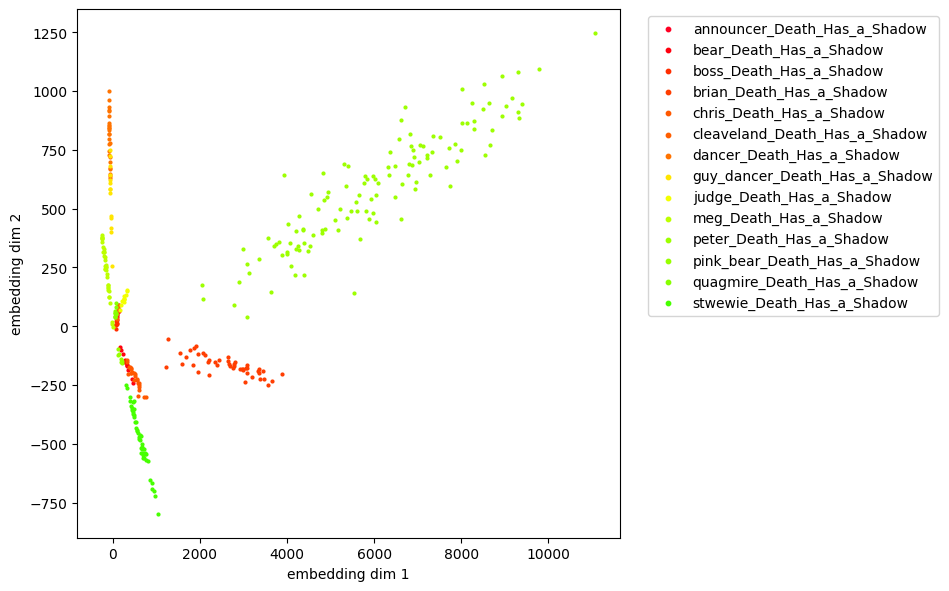

In [28]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(embeddings[label_idxs, 0],
                    embeddings[label_idxs, 1],
                    s=4,
                    color=cmap(i),
                    label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

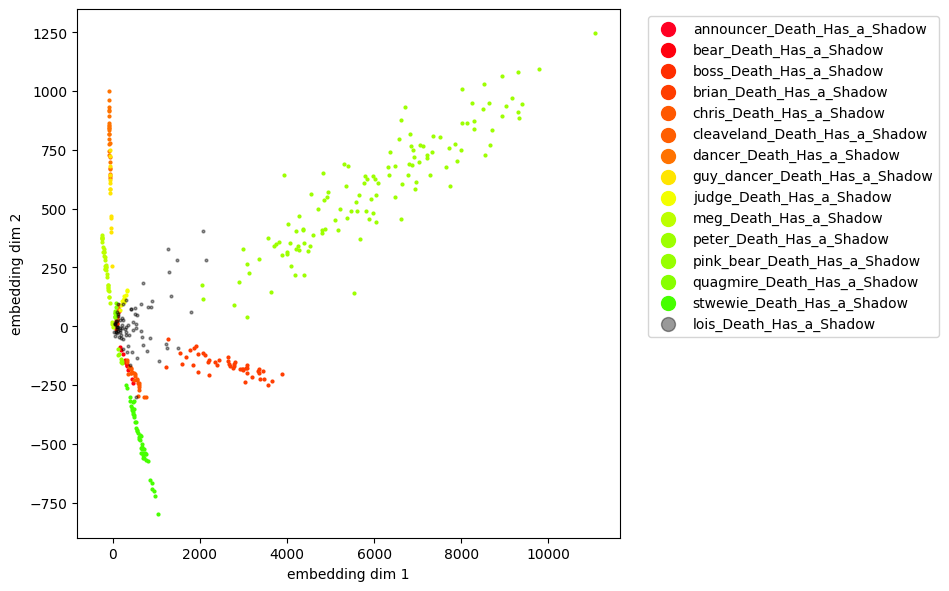

In [30]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.gist_rainbow

for i, label in enumerate(np.sort(np.unique(labels))):
    if 'Death_Has_a_Shadow' in le.classes_[i]:
        label_idxs = np.argwhere(labels == label)
        plt.scatter(embeddings[label_idxs, 0],
                    embeddings[label_idxs, 1],
                    s=4,
                    color=cmap(i),
                    label=le.classes_[i])

plt.scatter(test_embeddings[:, 0],
            test_embeddings[:, 1],
            s=4,
            color='black',
            alpha=0.4,
            label=face_to_holdout)

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([100])

plt.show()

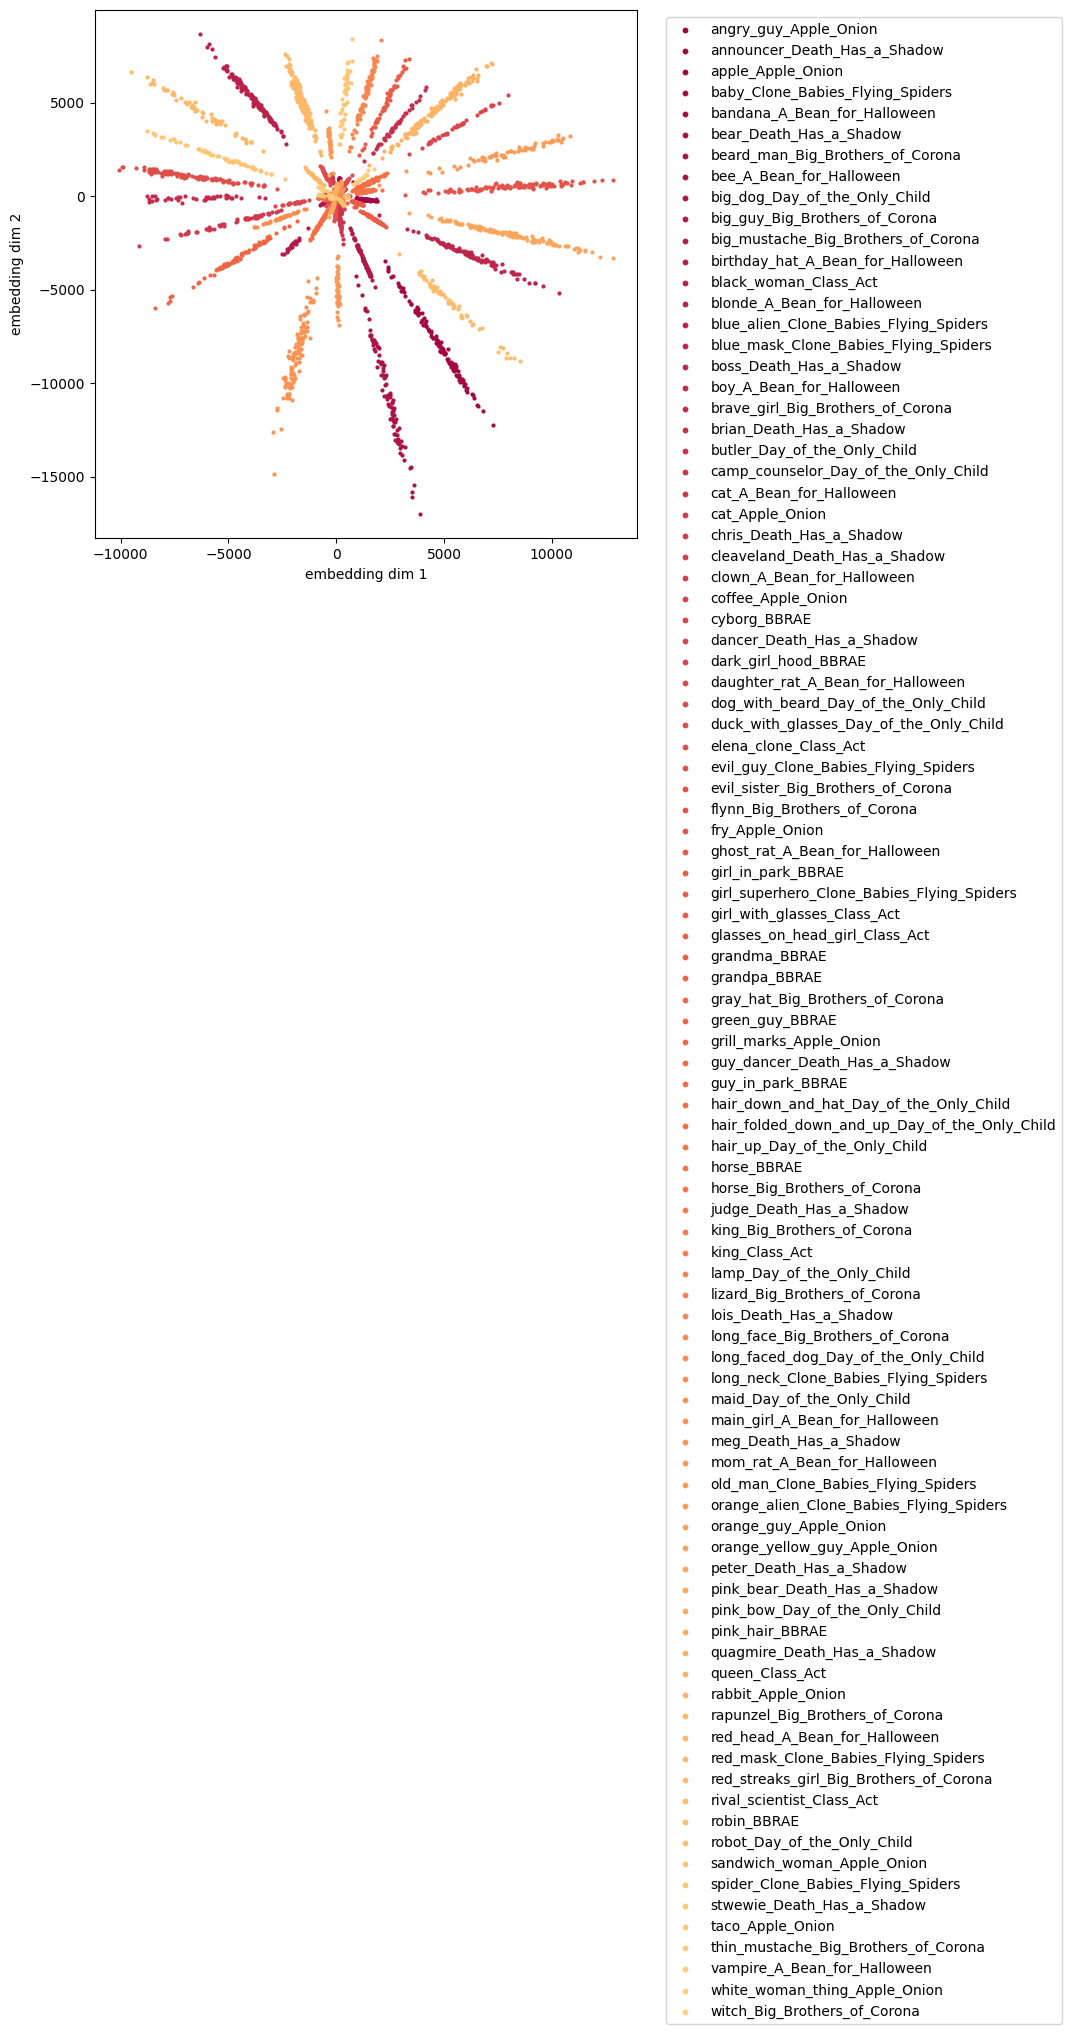

In [18]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.Spectral

for i, label in enumerate(np.sort(np.unique(labels))):
    label_idxs = np.argwhere(labels == label)
    plt.scatter(embeddings[label_idxs, 0],
                embeddings[label_idxs, 1],
                s=4,
                color=cmap(i),
                label=le.classes_[i])

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([10])

plt.show()

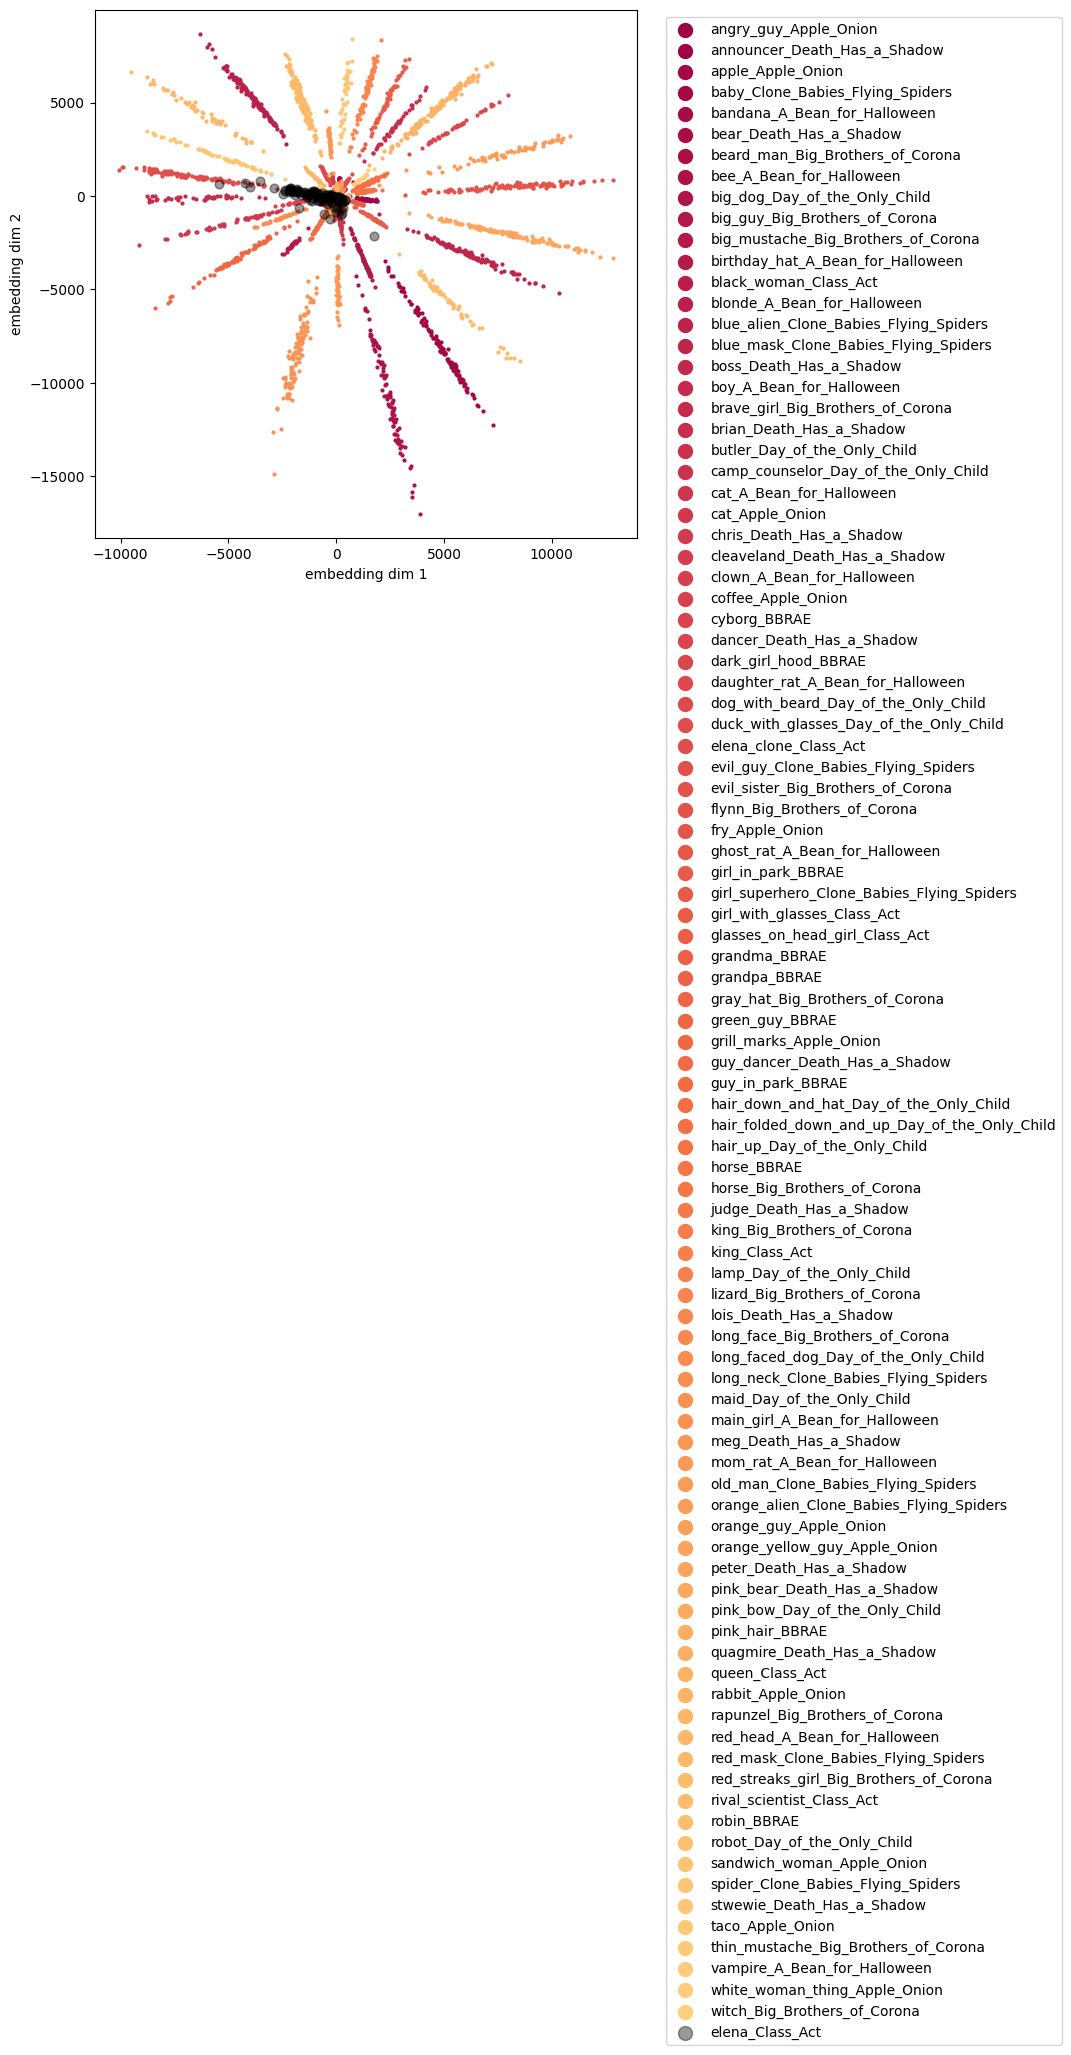

In [19]:
plt.figure(figsize=(7, 7), dpi=100)

cmap = plt.cm.Spectral

for i, label in enumerate(np.sort(np.unique(labels))):
    label_idxs = np.argwhere(labels == label)
    plt.scatter(embeddings[label_idxs, 0],
                embeddings[label_idxs, 1],
                s=4,
                color=cmap(i),
                label=le.classes_[i])

plt.scatter(test_embeddings[:, 0],
            test_embeddings[:, 1],
            s=40,
            color='black',
            alpha=0.4,
            label=face_to_holdout)

plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
lgnd = plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

for handle in lgnd.legendHandles:
    handle.set_sizes([100])

plt.show()

----- 